In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [2]:
plt.rcParams.update({'axes.titlesize' : 20,
                     'axes.labelsize' : 18,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16})
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette(["#00A321","#5C3993", "#E28413", '#A31621', "#009FFD", '#F551A8', '#0F9E7A']))
priv_palette=sns.color_palette(["#00A321", "#00CC29", "#00F531", "#1FFF4B"])
unpriv_palette=sns.color_palette(["#5C3993","#6E45B0","#835DC0","#9A7BCC"])
MR_palette=sns.color_palette(["#A31621","#C51B29","#E22837","#E74B58"])
SES_palette=sns.color_palette(["#E28413","#ED9831","#F0AB56","#F4BE7C"])

In [3]:
exp_name = 'exp17C'
results_dir = '/home/emma/Documents/BC_Sim/results/' + exp_name + '/'

#import results 
stats_df1 = pd.read_csv(results_dir + 'naive.csv', index_col=0)
stats_df2 = pd.read_csv(results_dir + 'EqOppFPR.csv', index_col=0)
stats_df3 = pd.read_csv(results_dir + 'EqOppTPR.csv', index_col=0)
stats_df4 = pd.read_csv(results_dir + 'EqOdds.csv', index_col=0)

In [4]:
stats_df = pd.concat([stats_df1, stats_df2, stats_df3, stats_df4])
stats_df = stats_df.replace({'naive': 'Naive'}) #capitalize Naive for plotting purposes
stats_df['alpha']=stats_df['alpha'].round(1)
stats_df

,year,n_priv,n_unpriv,n_healthy_priv,n_healthy_unpriv,n_BC_priv,n_BC_unpriv,n_died_priv,n_died_unpriv,n_screened_priv,...,lost_to_followup_frac,lost_to_followup_ratio,delay_ratio,delay_frac,t2_ratio,t2_frac,average_age_in_pool,alpha,n_sim,ai_fairness
0,0,250000,250000,249291,249270,709,730,52,139,249932,...,0.119176,2.144638,2.260000,0.211964,0.488584,0.847854,57.514413,0.0,877132087,Naive
1,1,249991,250009,249187,248962,804,1047,101,312,247704,...,0.118145,2.122951,2.200000,0.254237,0.624729,0.793432,57.557656,0.0,877132087,Naive
2,2,250080,249920,249228,248902,852,1018,97,336,247758,...,0.118358,2.076060,2.164179,0.225772,0.541667,0.827476,57.602825,0.0,877132087,Naive
3,3,250300,249700,249392,248702,908,998,122,331,247960,...,0.117942,2.140675,2.014925,0.204453,0.475320,0.816802,57.654395,0.0,877132087,Naive
4,4,250400,249600,249550,248604,850,996,113,337,248121,...,0.115724,2.116816,2.137931,0.199343,0.539235,0.837897,57.706861,0.0,877132087,Naive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56095,46,251310,248690,250416,247606,894,1084,118,366,248184,...,0.118642,2.051167,1.923077,0.233367,0.493433,0.814739,58.144866,1.0,683688611,EqOdds
56096,47,251400,248600,250536,247554,864,1046,114,350,248322,...,0.121703,2.042410,2.013699,0.230366,0.536204,0.821990,58.199166,1.0,683688611,EqOdds
56097,48,251482,248518,250543,247450,939,1068,108,366,248481,...,0.119138,2.066005,1.957143,0.203740,0.483304,0.830709,58.254116,1.0,683688611,EqOdds
56098,49,251430,248570,250518,247544,912,1026,130,359,248402,...,0.119565,1.978365,2.800000,0.209839,0.469945,0.810241,58.304757,1.0,683688611,EqOdds


In [5]:
#compute derived metrics
#group mortality rates
stats_df['MR_priv'] = stats_df['n_died_priv']/stats_df['n_priv']*1e5
stats_df['MR_unpriv'] = stats_df['n_died_unpriv']/stats_df['n_unpriv']*1e5
stats_df['deltaMR'] = stats_df['MR_unpriv']-stats_df['MR_priv']
stats_df['MR_ratio'] = stats_df['MR_unpriv']/stats_df['MR_priv']

#inter-group deltaSEI
stats_df['inter_dSEI'] = np.absolute(stats_df['SEI_avg_priv']-stats_df['SEI_avg_unpriv'])

#percent change in inter-group deltaSEI 
stats_df['change_inter_dSEI'] = stats_df['inter_dSEI'].pct_change()*100

#intra-group deltaSEI
stats_df['intra_dSEI_priv'] = stats_df['SEI_max_priv']-stats_df['SEI_min_priv']
stats_df['intra_dSEI_unpriv'] = -stats_df['SEI_max_unpriv']-stats_df['SEI_min_unpriv']

In [6]:
stats_df

,year,n_priv,n_unpriv,n_healthy_priv,n_healthy_unpriv,n_BC_priv,n_BC_unpriv,n_died_priv,n_died_unpriv,n_screened_priv,...,n_sim,ai_fairness,MR_priv,MR_unpriv,deltaMR,MR_ratio,inter_dSEI,change_inter_dSEI,intra_dSEI_priv,intra_dSEI_unpriv
0,0,250000,250000,249291,249270,709,730,52,139,249932,...,877132087,Naive,20.800000,55.600000,34.800000,2.673077,1.998827,NaN,4.584555,2.425840
1,1,249991,250009,249187,248962,804,1047,101,312,247704,...,877132087,Naive,40.401454,124.795507,84.394053,3.088887,1.999554,0.036398,4.584555,2.543229
2,2,250080,249920,249228,248902,852,1018,97,336,247758,...,877132087,Naive,38.787588,134.443022,95.655434,3.466135,1.999500,-0.002725,5.289975,2.620914
3,3,250300,249700,249392,248702,908,998,122,331,247960,...,877132087,Naive,48.741510,132.559071,83.817561,2.719634,1.999115,-0.019253,5.289975,2.860526
4,4,250400,249600,249550,248604,850,996,113,337,248121,...,877132087,Naive,45.127796,135.016026,89.888230,2.991860,1.998789,-0.016292,5.289975,2.860526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56095,46,251310,248690,250416,247606,894,1084,118,366,248184,...,683688611,EqOdds,46.953961,147.171177,100.217216,3.134372,1.998974,-0.004367,5.464278,2.892559
56096,47,251400,248600,250536,247554,864,1046,114,350,248322,...,683688611,EqOdds,45.346062,140.788415,95.442353,3.104755,1.999075,0.005009,5.608578,2.892559
56097,48,251482,248518,250543,247450,939,1068,108,366,248481,...,683688611,EqOdds,42.945420,147.273035,104.327615,3.429307,1.999470,0.019805,5.608578,3.075674
56098,49,251430,248570,250518,247544,912,1026,130,359,248402,...,683688611,EqOdds,51.704252,144.426117,92.721866,2.793312,1.999607,0.006832,5.608578,3.075674


In [7]:
def plt_deltaMR(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x ='alpha', y='deltaMR', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=MR_palette)
    plt.title('50-yr Average Mortality Rate Disparity')
    plt.xlabel('AI Reliance Parameter')
    plt.ylabel('Mortality Rate Disparity (per 100k)')
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'deltaMR.png', dpi=800)
        plt.savefig(results_dir + 'deltaMR.svg')
    plt.show()

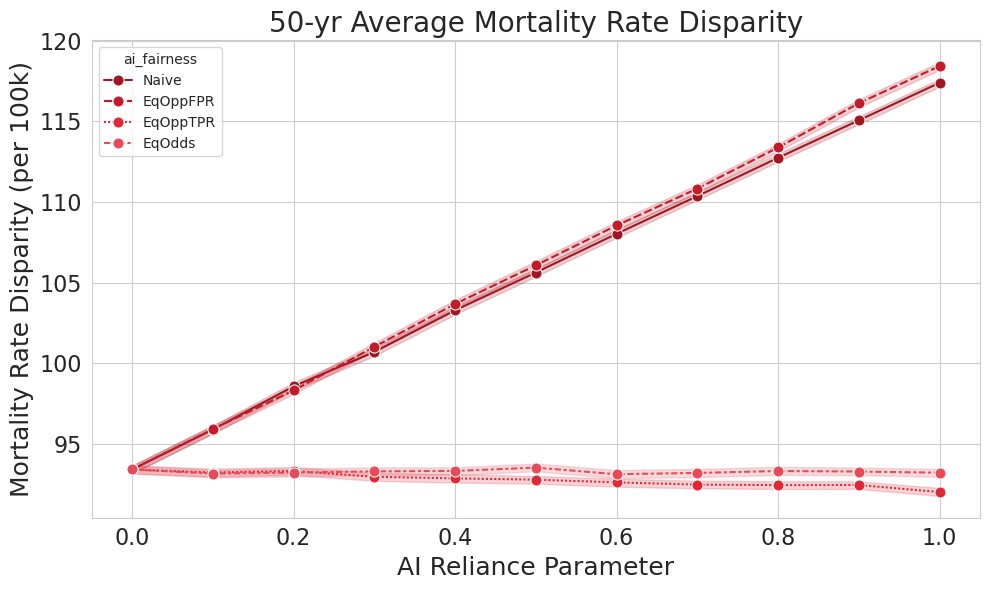

In [8]:
plt_deltaMR(stats_df)

In [9]:
def plt_MRratio(df, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(10,6))
    # sns.pointplot(data=df, x ='alpha', y='MR_ratio', hue='ai_fairness', linestyles = ['-', '--', ':', '-.'], markersize=5, dodge=0.2, palette=MR_palette)
    sns.lineplot(data=df, x ='alpha', y='MR_ratio', style='ai_fairness', hue='ai_fairness', marker='o', markersize=8, palette=MR_palette)
    plt.title('50-yr Average Mortality Rate Ratio')
    plt.xlabel('AI Reliance Parameter')
    plt.ylabel('Mortality Rate Ratio\n(Unprivileged/Privileged)')
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + 'MR_ratio.png', dpi=800)
        plt.savefig(results_dir + 'MR_ratio.svg')
    plt.show()

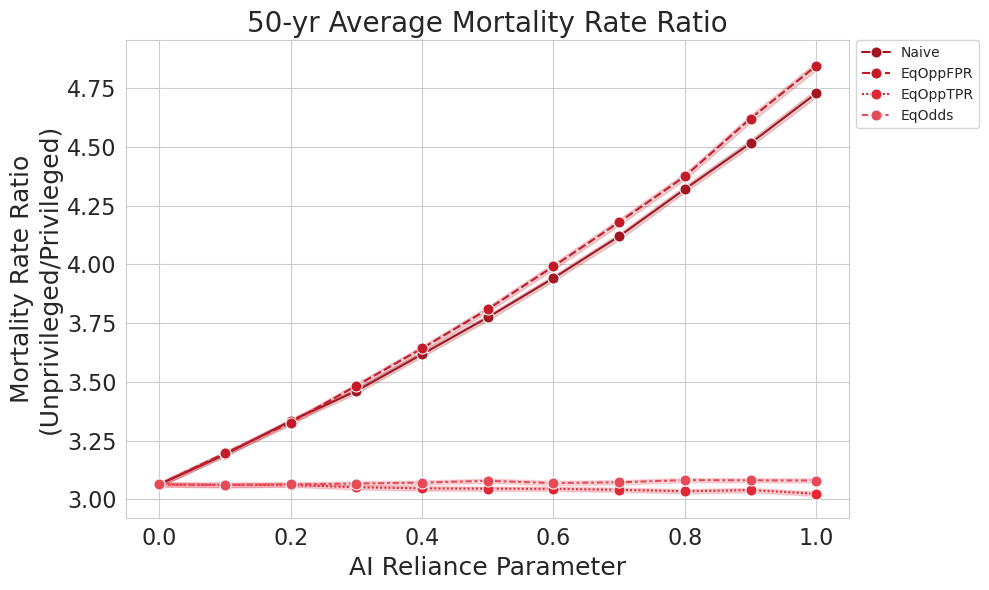

In [10]:
plt_MRratio(stats_df)

In [11]:
def plt_misdiagnoses(df, modelname, save=False): 
    #remove yr 1 from data
    df = df[df.year != 0]
    
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x='alpha', y='FPR_priv', label='FPR: Priv', marker='o', color=sns.color_palette()[3])
    sns.lineplot(data=df, x='alpha', y='FPR_unpriv', label='FPR: Unpriv', marker='o',color=sns.color_palette()[4])
    sns.lineplot(data=df, x='alpha', y='FNR_priv', label='FNR: Priv', marker='o',color=sns.color_palette()[5])
    sns.lineplot(data=df, x='alpha', y='FNR_unpriv', label='FNR: Unpriv',marker='o', color=sns.color_palette()[6])
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.title(f'Misdiagnoses: {modelname} Model')
    plt.xlabel('AI Reliance Parameter')
    plt.ylabel('Performance (%)')
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + modelname + '_misdiagnoses.png', dpi=800)
        plt.savefig(results_dir + modelname + '_misdiagnoses.svg')
    plt.show()    

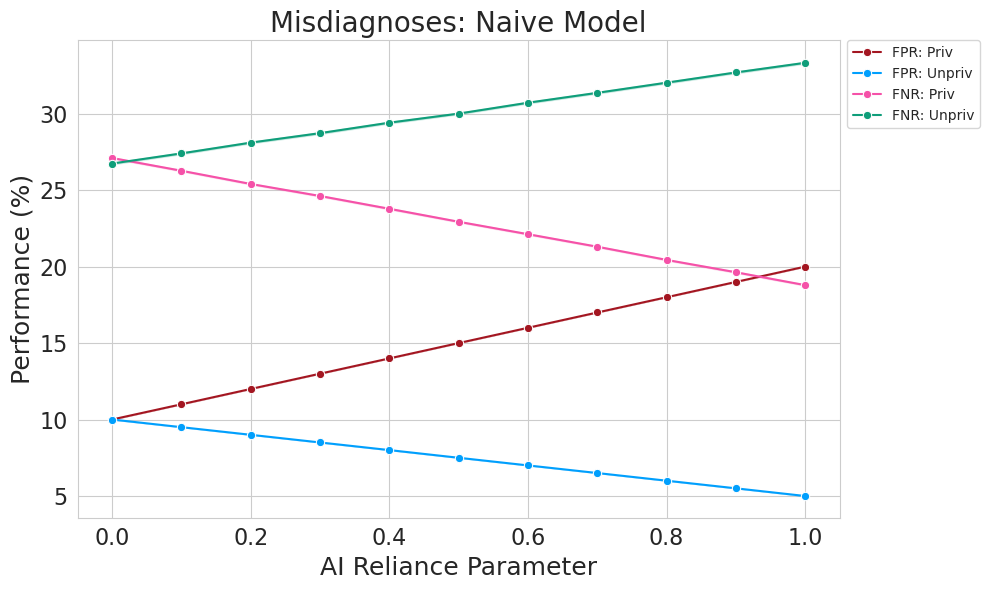

In [12]:
plt_misdiagnoses(stats_df1, 'Naive')

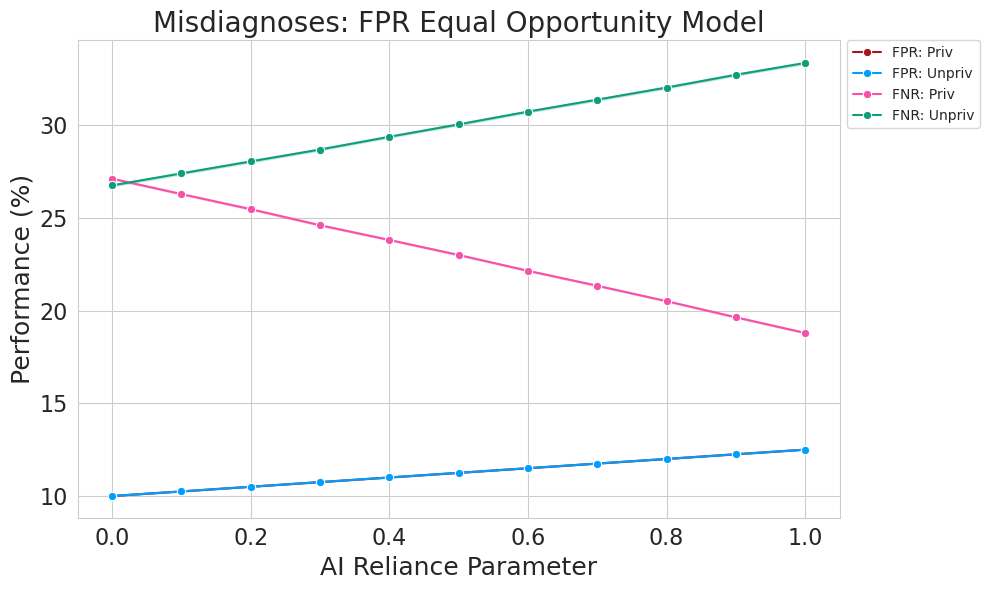

In [13]:
plt_misdiagnoses(stats_df2, 'FPR Equal Opportunity')

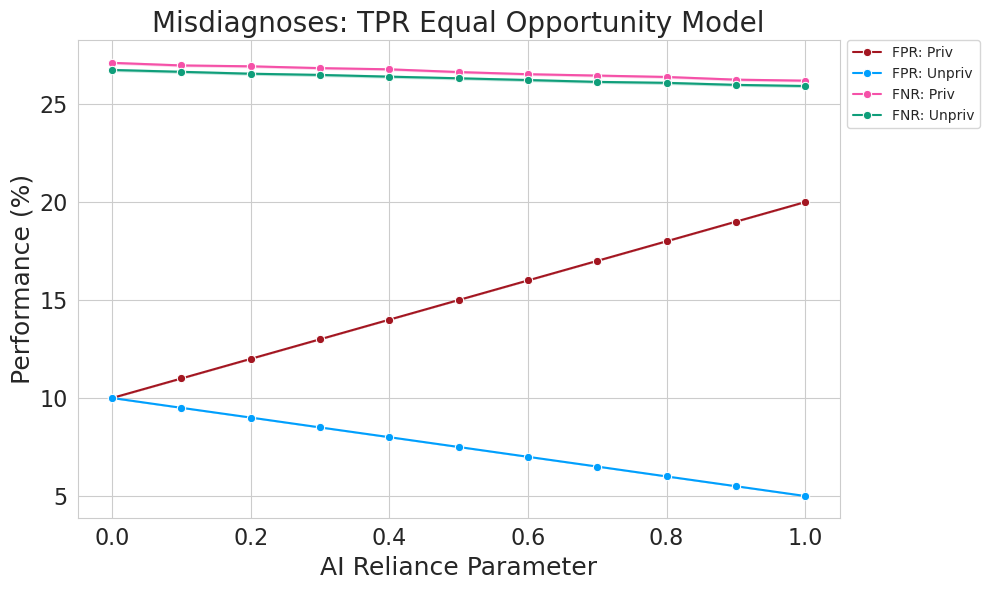

In [14]:
plt_misdiagnoses(stats_df3, 'TPR Equal Opportunity')

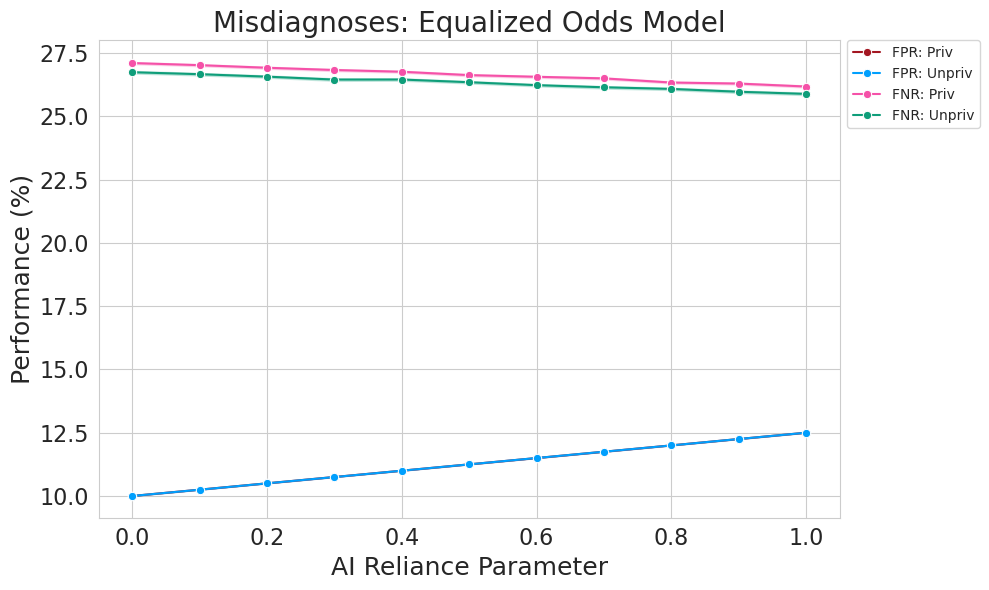

In [15]:
plt_misdiagnoses(stats_df4, 'Equalized Odds')

In [16]:
#melt dataframe to plot group-wise misdiagnosis
FPR_df = pd.melt(stats_df, id_vars = ['alpha', 'n_sim', 'ai_fairness'], value_vars = ['FPR_priv', 'FPR_unpriv'], var_name='group', value_name='FP Rate')
FPR_df['group'] = FPR_df['group'].replace({'FPR_priv':'Privileged', 'FPR_unpriv':'Unprivileged'})

In [17]:
FPR_df

,alpha,n_sim,ai_fairness,group,FP Rate
0,0.0,877132087,Naive,Privileged,9.996268
1,0.0,877132087,Naive,Privileged,9.958567
2,0.0,877132087,Naive,Privileged,9.896683
3,0.0,877132087,Naive,Privileged,9.953169
4,0.0,877132087,Naive,Privileged,10.038459
...,...,...,...,...,...
448795,1.0,683688611,EqOdds,Unprivileged,12.450416
448796,1.0,683688611,EqOdds,Unprivileged,12.511333
448797,1.0,683688611,EqOdds,Unprivileged,12.514101
448798,1.0,683688611,EqOdds,Unprivileged,12.636258


In [18]:
def plt_FPR(df, save=False): 
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x ='alpha', y='FP Rate', hue='group', style='ai_fairness', marker='o', alpha=0.5)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xlabel('AI Reliance Parameter')
    plt.ylabel('False Positive Rate (%)')
    plt.title('False Positive Rate')
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + '_FPR.png', dpi=800)
        plt.savefig(results_dir +  '_FPR.svg')
    plt.show()    

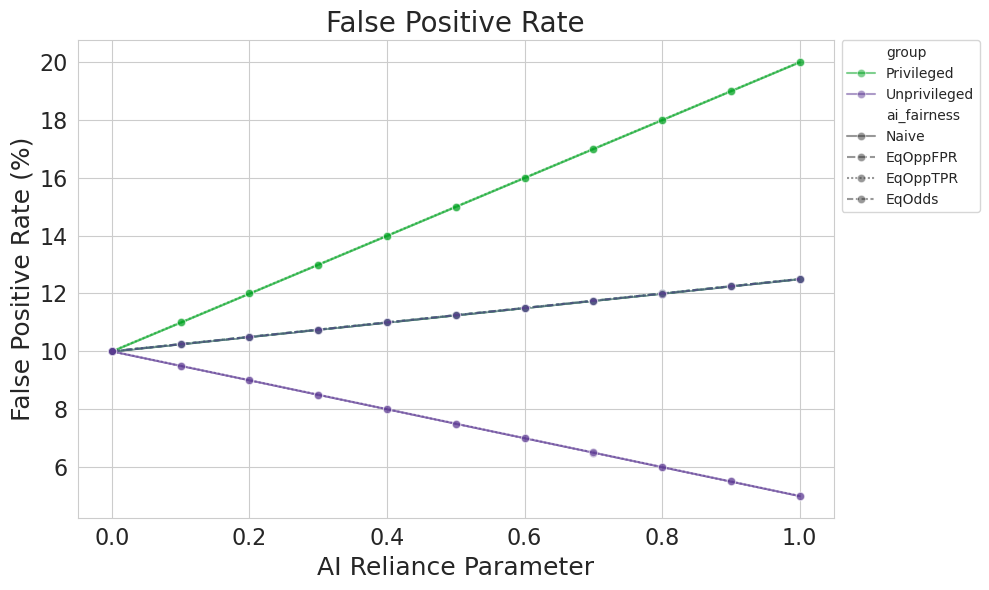

In [19]:
plt_FPR(FPR_df)

In [20]:
#melt dataframe to plot group-wise misdiagnosis
FNR_df = pd.melt(stats_df, id_vars = ['alpha', 'n_sim', 'ai_fairness'], value_vars = ['FNR_priv', 'FNR_unpriv'], var_name='group', value_name='FN Rate')
FNR_df['group'] = FNR_df['group'].replace({'FNR_priv':'Privileged', 'FNR_unpriv':'Unprivileged'})

In [21]:
FNR_df

,alpha,n_sim,ai_fairness,group,FN Rate
0,0.0,877132087,Naive,Privileged,27.362482
1,0.0,877132087,Naive,Privileged,27.715356
2,0.0,877132087,Naive,Privileged,28.453365
3,0.0,877132087,Naive,Privileged,26.910299
4,0.0,877132087,Naive,Privileged,28.978622
...,...,...,...,...,...
448795,1.0,683688611,EqOdds,Unprivileged,29.325513
448796,1.0,683688611,EqOdds,Unprivileged,26.998492
448797,1.0,683688611,EqOdds,Unprivileged,23.824451
448798,1.0,683688611,EqOdds,Unprivileged,28.056426


In [22]:
def plt_FNR(df, save=False): 
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df, x ='alpha', y='FN Rate', hue='group', style='ai_fairness', marker='o', alpha=0.5)
    plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
    plt.xlabel('AI Reliance Parameter')
    plt.ylabel('False Negative Rate (%)')
    plt.title('False Negative Rate')
    plt.tight_layout()
    if save:
        plt.savefig(results_dir + '_FNR.png', dpi=800)
        plt.savefig(results_dir +  '_FNR.svg')
    plt.show()    

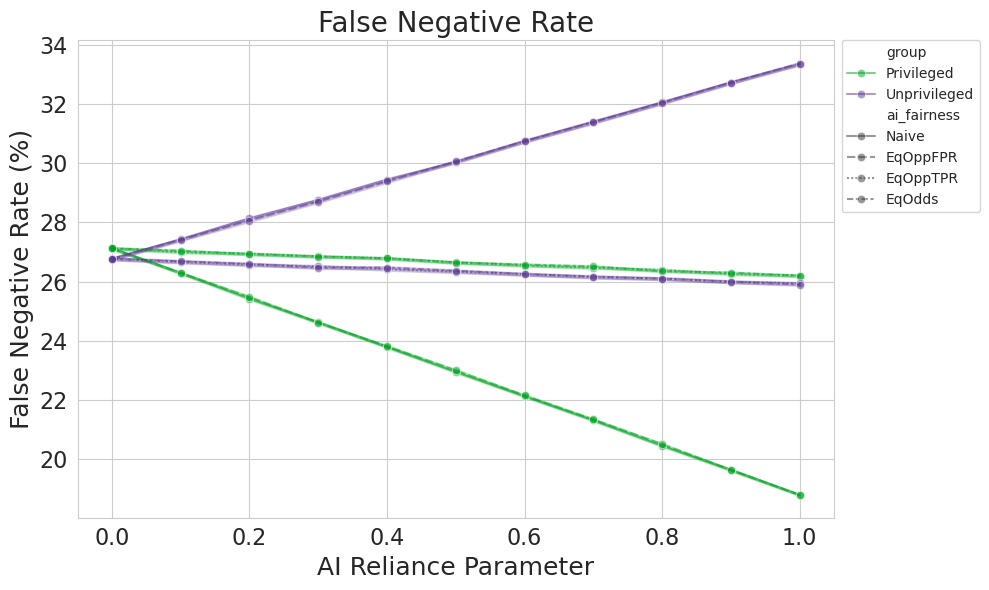

In [23]:
plt_FNR(FNR_df)

#### table 1 results

In [24]:
def compute_avg_metrics(df, metric_col, alpha, ai_fairness):
    '''
    compute 50-year average for a single metric across all simulations
    '''
    
    #remove yr 1 from data
    df = df[df.year != 0]
    
    #get dataframe for specific fairness scenario
    df = df.loc[(df['ai_fairness'] == ai_fairness) & (df['alpha'] == alpha)]
    
    stats = df.groupby(['n_sim'])[metric_col].agg(['mean', 'count', 'std'])
    # print(stats)
    print('-'*75)
    
    #get 95% confidence interval of average metric over all simulations
    m = stats['mean'].mean()
    s = stats['mean'].std()
    c = stats['mean'].count()

    ci95_hi = m + 1.96*s/math.sqrt(c)
    ci95_low = m - 1.96*s/math.sqrt(c)

    print(f'average(95%CI) {metric_col} for {ai_fairness} over {c} simulations: {m:.2f} ({ci95_low:.2f}, {ci95_hi:.2f})')
    print('-'*75)

In [25]:
alpha=0.0
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['FPR_priv', 'FNR_priv', 'FPR_unpriv', 'FNR_unpriv']:
        compute_avg_metrics(stats_df, metric, alpha, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) FPR_priv for Naive over 100 simulations: 10.00 (10.00, 10.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FNR_priv for Naive over 100 simulations: 27.11 (27.07, 27.14)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FPR_unpriv for Naive over 100 simulations: 10.00 (10.00, 10.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FNR_unpriv for Naive over 100 simulations: 26.74 (26.70, 26.79)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
aver

In [26]:
alpha=0.5
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['FPR_priv', 'FNR_priv', 'FPR_unpriv', 'FNR_unpriv']:
        compute_avg_metrics(stats_df, metric, alpha, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) FPR_priv for Naive over 100 simulations: 15.00 (15.00, 15.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FNR_priv for Naive over 100 simulations: 22.94 (22.90, 22.98)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FPR_unpriv for Naive over 100 simulations: 7.50 (7.50, 7.50)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FNR_unpriv for Naive over 100 simulations: 30.01 (29.96, 30.06)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average

In [27]:
alpha=1.0
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['FPR_priv', 'FNR_priv', 'FPR_unpriv', 'FNR_unpriv']:
        compute_avg_metrics(stats_df, metric, alpha, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) FPR_priv for Naive over 100 simulations: 20.00 (20.00, 20.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FNR_priv for Naive over 100 simulations: 18.79 (18.76, 18.83)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FPR_unpriv for Naive over 100 simulations: 5.00 (5.00, 5.00)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) FNR_unpriv for Naive over 100 simulations: 33.33 (33.28, 33.39)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average

In [28]:
alpha=0.0
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['MR_priv', 'MR_unpriv']:
        compute_avg_metrics(stats_df, metric, alpha, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) MR_priv for Naive over 100 simulations: 45.86 (45.73, 45.99)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_unpriv for Naive over 100 simulations: 139.29 (139.04, 139.53)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_priv for EqOppFPR over 100 simulations: 45.86 (45.73, 45.99)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_unpriv for EqOppFPR over 100 simulations: 139.29 (139.04, 139.53)
---------------------------------------------------------------------------
------------------------------------------------------------------------

In [29]:
alpha=0.5
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['MR_priv', 'MR_unpriv']:
        compute_avg_metrics(stats_df, metric, alpha, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) MR_priv for Naive over 100 simulations: 38.63 (38.51, 38.75)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_unpriv for Naive over 100 simulations: 144.26 (144.04, 144.48)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_priv for EqOppFPR over 100 simulations: 38.31 (38.20, 38.43)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_unpriv for EqOppFPR over 100 simulations: 144.39 (144.17, 144.62)
---------------------------------------------------------------------------
------------------------------------------------------------------------

In [30]:
alpha=1.0
for ai_fairness in ['Naive', 'EqOppFPR', 'EqOppTPR', 'EqOdds']:
    for metric in ['MR_priv', 'MR_unpriv']:
        compute_avg_metrics(stats_df, metric, alpha, ai_fairness)

---------------------------------------------------------------------------
average(95%CI) MR_priv for Naive over 100 simulations: 31.99 (31.90, 32.08)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_unpriv for Naive over 100 simulations: 149.39 (149.19, 149.58)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_priv for EqOppFPR over 100 simulations: 31.31 (31.21, 31.40)
---------------------------------------------------------------------------
---------------------------------------------------------------------------
average(95%CI) MR_unpriv for EqOppFPR over 100 simulations: 149.74 (149.50, 149.98)
---------------------------------------------------------------------------
------------------------------------------------------------------------